In [1]:
save = False
figsize = (6,5)

# Plotting functions 


In [2]:
# plotting functions
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from scipy.interpolate import griddata
from scipy.optimize import curve_fit
# from module import plottingfuncs

nicecolors = ["royalblue", "darkorange", "limegreen", "purple", "teal", "gold", "fuchsia", "maroon", "gray", "black"]

def plot_scatter(ax, x, y, label=None, color="royalblue", marker=None, alpha=0.7):
    """
    Plots a scatter plot on the given axes.

    Args:
        ax (matplotlib.axes.Axes): The axes on which to plot.
        x (array-like): The x-coordinates of the data points.
        y (array-like): The y-coordinates of the data points.
        label (str, optional): The label for the scatter plot. Defaults to None.
        color (str, optional): The color of the scatter plot. Defaults to "royalblue".
    """
    label = f'{label}' if label else None
    # Plot data
    sns.scatterplot(x=x, y=y, ax=ax, label=label, color=color, marker=marker, alpha=alpha,
                        s=80)
    sns.despine(ax=ax)

def plot_line(ax, x, y, label=None, color="royalblue", marker=None, alpha=0.7):
    """
    Plots a line plot on the given axes.

    Args:
        ax (matplotlib.axes.Axes): The axes on which to plot.
        x (array-like): The x-coordinates of the data points.
        y (array-like): The y-coordinates of the data points.
        label (str, optional): The label for the line plot. Defaults to None.
        color (str, optional): The color of the line plot. Defaults to "royalblue".
        marker (str, optional): The marker style for the line plot. Defaults to None.
    """
    label = f'{label}' if label else None
    # Plot data
    sns.lineplot(x=x, y=y, ax=ax, label=label, color=color, marker=marker, alpha=alpha)
    sns.despine(ax=ax)

def plot_data(ax, x, y, label=None, color="royalblue", marker='o', alpha=0.7):
    """
    Plots a line plot on the given axes.

    Args:
        ax (matplotlib.axes.Axes): The axes on which to plot.
        x (array-like): The x-coordinates of the data points.
        y (array-like): The y-coordinates of the data points.
        label (str, optional): The label for the line plot. Defaults to None.
        color (str, optional): The color of the line plot. Defaults to "royalblue".
        marker (str, optional): The marker style for the line plot. Defaults to None.
    """
    label = f'{label}' if label else None
    # Plot data
    sns.lineplot(x=x, y=y, ax=ax, label=label, color=color, marker=marker, alpha=alpha)
    sns.despine(ax=ax)

def plot_labels(ax, xlabel='', ylabel='', title='', fts=16):
    """
    Sets the labels and title of the given axes.

    Args:
        ax (matplotlib.axes.Axes): The axes to modify.
        xlabel (str, optional): The label for the x-axis. Defaults to ''.
        ylabel (str, optional): The label for the y-axis. Defaults to ''.
        title (str, optional): The title of the plot. Defaults to ''.
        fts (int, optional): The font size for the labels and title. Defaults to 16.
    """
    # Labels and title
    ax.set_xlabel(xlabel, fontsize=fts)
    ax.set_ylabel(ylabel, fontsize=fts)
    ax.set_title(title, fontsize=fts)

def plot_fit(ax, x, y, fit_func, color=None, linestyle=None, label=None, p0=None):
    """
    Fits a curve to the data and plots the fit on the given axes.

    Args:
        ax (matplotlib.axes.Axes): The axes on which to plot.
        x (array-like): The x-coordinates of the data points.
        y (array-like): The y-coordinates of the data points.
        fit_func (callable): The function to use for fitting.
        color (str, optional): The color of the fit line. Defaults to None.
        linestyle (str, optional): The linestyle of the fit line. Defaults to None.
        label (str or callable, optional): The label for the fit line. If callable,
          it will be called with the fit parameters. Defaults to None.

    Returns:
        tuple: A tuple containing the fit parameters, covariance matrix, and R^2 value.
    """
    # Fit curve
    popt, popc = curve_fit(fit_func, x, y, p0=p0)

    if callable(label):
        label = label(*popt)
    spread = max(x) - min(x)
    xfit = np.linspace(min(x) - spread, max(x) + spread, 1000)
    y_fit = fit_func(xfit, *popt)
    label = f'{label}' if label else None
    sns.lineplot(ax=ax, x=xfit, y=y_fit, label=label, color=color, linestyle=linestyle, alpha=0.7)

    # Compute R^2
    ss_res = np.sum((y - fit_func(x, *popt)) ** 2)  # Residual sum of squares
    ss_tot = np.sum((y - np.mean(y)) ** 2)  # Total sum of squares
    R2 = 1 - (ss_res / ss_tot)
    print(f'Fit parameters: {popt}', f' R^2: {R2}')
    return popt, popc, R2

def plot_lims(ax, x, y, xlims=['d', 'd'], ylims=['d', 'd']):
    """
    Sets the limits of the x and y axes.

    Args:
        ax (matplotlib.axes.Axes): The axes to modify.
        x (array-like): The x-coordinates of the data points.
        y (array-like): The y-coordinates of the data points.
        xlims (list, optional): The limits for the x-axis. 'd' indicates default limits. Defaults to ['d', 'd'].
        ylims (list, optional): The limits for the y-axis. 'd' indicates default limits. Defaults to ['d', 'd'].
    """
    span = lambda x: max(x) - min(x)
    if ylims:
        if ylims[0] == 'd':
            ylims[0] = min(y) - span(y) * 0.05
        if ylims[1] == 'd':
            ylims[1] = max(y) + span(y) * 0.05
        ax.set_ylim(ylims)
    if xlims:
        if xlims[0] == 'd':
            xlims[0] = min(x) - span(x) * 0.05
        if xlims[1] == 'd':
            xlims[1] = max(x) + span(x) * 0.05
        ax.set_xlim(xlims)

def plot_ticks(ax,fts =12, x_ticks=None, y_ticks=None, x_scale=None, y_scale=None, default_ticks=5):
    """
    Adjusts the ticks of a matplotlib axis to look nicer, with improved tick value selection.

    Args:
        ax (matplotlib.axes.Axes): The axis to adjust.
        x_ticks (int or list, optional): Number of x-axis ticks or explicit tick positions.
        y_ticks (int or list, optional): Number of y-axis ticks or explicit tick positions.
        x_scale (str, optional): Scaling of the x-axis ('linear', 'log', etc.).
        y_scale (str, optional): Scaling of the y-axis ('linear', 'log', etc.).
        default_ticks (int, optional): The default number of ticks if x_ticks or y_ticks are not provided.
    """

    if x_ticks is None:
        if x_scale == 'log':
            ax.xaxis.set_major_locator(ticker.LogLocator(numticks=default_ticks))
        else:
            ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=default_ticks, integer=False))  # changed to MaxNLocator
    elif isinstance(x_ticks, int):
        if x_scale == 'log':
            ax.xaxis.set_major_locator(ticker.LogLocator(numticks=x_ticks))
        else:
            ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=x_ticks, integer=False))  # changed to MaxNLocator
    else:
        ax.set_xticks(x_ticks)

    if y_ticks is None:
        if y_scale == 'log':
            ax.yaxis.set_major_locator(ticker.LogLocator(numticks=default_ticks))
        else:
            ax.yaxis.set_major_locator(ticker.MaxNLocator(nbins=default_ticks, integer=False))  # changed to MaxNLocator
    elif isinstance(y_ticks, int):
        if y_scale == 'log':
            ax.yaxis.set_major_locator(ticker.LogLocator(numticks=y_ticks))
        else:
            ax.yaxis.set_major_locator(ticker.MaxNLocator(nbins=y_ticks, integer=False))  # changed to MaxNLocator
    else:
        ax.set_yticks(y_ticks)

    if x_scale == 'log':
        ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
    if y_scale == 'log':
        ax.yaxis.set_major_formatter(ticker.ScalarFormatter())

    ax.tick_params(axis='both', which='major', labelsize=10)
    ax.tick_params(axis='both', which='minor', labelsize=8)
    ax.tick_params(axis='both', which='both', direction='out')
    ax.tick_params(axis='both', which='major', length=5)
    ax.tick_params(axis='both', which='minor', length=2.5)

    if x_scale == 'log':
        ax.xaxis.set_minor_locator(ticker.LogLocator(subs='auto'))
    if y_scale == 'log':
        ax.yaxis.set_minor_locator(ticker.LogLocator(subs='auto'))
    if x_scale == 'linear':
        ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    if y_scale == 'linear':
        ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())

    ax.tick_params(axis='x', labelsize=fts)
    ax.tick_params(axis='y', labelsize=fts)

def plot_legend(ax, legfts=12, loc=None, remove=[]):
    """
    Adds a legend to the given axis with optional customization.

    Parameters:
    ax (matplotlib.axes.Axes): The axis to add the legend to.
    legfts (int, optional): Font size of the legend. Defaults to 12.
    loc (str or int, optional): Location of the legend. Uses Matplotlib's legend location codes. Defaults to None.
    remove (list, optional): List of indices of legend items to exclude. Defaults to an empty list.

    Returns:
    None
    """
    handles, labels = ax.get_legend_handles_labels()
    nlabels = [item for i, item in enumerate(labels) if i not in remove]
    nhandles = [item for i, item in enumerate(handles) if i not in remove]
    ax.legend(handles=nhandles, labels=nlabels, fontsize=legfts, loc=loc)


def plot_show(fig,ax, save_path=None):
    """
    Adjusts the layout of the figure and either displays or saves it.

    Parameters:
    fig (matplotlib.figure.Figure): The figure to display or save.
    save_path (str, optional): File path to save the figure. If None, the figure is shown instead. Defaults to None.

    Returns:
    None
    """
    fig.tight_layout()
    if save_path:
        fig.savefig(save_path, dpi=300, bbox_inches='tight')
    fig.show()


# fitting lambda functions
exp_fit = lambda x, a, b: a* np.exp( b * x)
exp_label = lambda a, b: f"$y = {a:.2f} e^{{{b:.2f} x}}$"

exp_fitC = lambda x, a, b, c: a* np.exp( b * x) + c
expC_label = lambda a, b, c: f"$y = {a:.2f} e^{{{b:.2f} x}} + {c:.2f}$"

linear_fit = lambda x, a, b: a*x + b
linear_label = lambda a, b: f"$y = {a:.2f}x+ {b:.2f}$"

quad_fit = lambda x, a, b, c: a*x**2 + b*x +c
quad_label = lambda a, b, c: f"$y = {a:.2f}x^2 + {b:.2f}x+c$"


/Applications/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (




# Loading data from the excel file

In [3]:
import pandas as pd
import numpy as np
from tqdm import tqdm

pd.options.display.float_format = '{:.2f}'.format

def extract_datasets_with_titles(df):
    """
    Extracts individual datasets from a DataFrame separated by rows containing 'x'
    and assigns dataset titles from the corresponding row.

    Args:
        df: The pandas DataFrame containing the data.

    Returns:
        A dictionary where keys are dataset titles and values are corresponding DataFrames.
    """
    datasets = {}

    # Store the dataset title
    x_indicies = []
    for index, row in df.iterrows():
        row_values = row.values
        # Check if row contains 'x', meaning it's a dataset separator
        if 'x' in str(row_values):
            x_indicies.append(index)


    for i, index in enumerate(x_indicies[:-1]):
        Title = df.iloc[index,1]
        T = df.iloc[index,2]

        # Save previous dataset (if exists)
        df_extracted = pd.DataFrame(df.iloc[index+1:x_indicies[i+1]])
        # print(df_extracted)
        df_extracted = df_extracted.dropna(axis=1, how='all').dropna(axis=0, how='all')  # Clean NaNs

        df_extracted.attrs['T'] = T
        df_extracted.attrs['Title'] = Title

        datasets[Title] = df_extracted  # Store dataset with its title

    Title = df.iloc[x_indicies[-1],1]
    T = df.iloc[x_indicies[-1],2]
    df_extracted = pd.DataFrame(df.iloc[x_indicies[-1]+1:])
    df_extracted = df_extracted.dropna(axis=1, how='all').dropna(axis=0, how='all')  # Clean NaNs
    df_extracted.attrs['T'] = T
    df_extracted.attrs['Title'] = Title
    datasets[Title] = df_extracted  # Store dataset with its title


    return datasets

# dataset loading
def load_dataset(name):
    """ Not part of the class as invloved in preperation.
    requires name of dataset
    returns: x (varied concerntraions),
             y (normalised luminosity measurements),
             indepvar (the [enzyme] which is varried)
    """
    dataset = datasets[name] # load data
    indepvar = dataset.attrs['variable']
    buffer_indices = dataset.attrs.get('buffer_indicies', [])
    data = dataset.drop(columns=buffer_indices) #get only data values not buffer
    slicer = slice(None,None) #can be used to remove certain values
    # reminder x usually goes from hight to low in data!
    x = data.loc[indepvar][slicer]
    y = data.loc["norm_mean"][slicer] #luminosity normed by avg buffer
    T = data.attrs['T']
    return x, y, indepvar, T

def load_dataset_v2(name): # new version of load_dataset that can load ALLmain, TBD:
    """ Not part of the class as invloved in preperation.
    requires name of dataset
    returns: x (varied concerntraions),
             y (normalised luminosity measurements),
             indepvar (the [enzyme] which is varried)
    """
    dataset = datasets[name] # load data uses datasets outside of scope

    indepvar = dataset.attrs['variable']
    if indepvar != 'multi':
      buffer_indices = dataset.attrs.get('buffer_indicies', [])
      data = dataset.drop(columns=buffer_indices) #get only data values not buffer
      slicer = slice(None,None) #can be used to remove certain values
      # reminder x usually goes from hight to low in data!
      x = data.loc[indepvar][slicer]
      y = data.loc["norm_mean"][slicer] #luminosity normed by avg buffer
      T = data.attrs['T']
      return x, y, indepvar, T
    else: # actually works only for the AAP and FAE case in allmain but that's what we care for
      indepvar1 = 'AAP'
      indepvar2 = 'FAE'
      buffer_indices = dataset.attrs.get('buffer_indicies', [])
      data = dataset.drop(columns=buffer_indices) #get only data values not buffer
      slicer = slice(None,None) #can be used to remove certain values
      x1 = dataset.loc[indepvar1]
      x2 = dataset.loc[indepvar2]
      y = dataset.loc["norm_mean"] #luminosity normed by avg buffer
      T = dataset.attrs['T']
      return x1, x2, y, indepvar1, indepvar2, T


In [4]:
# Load CSV file
datapath = 'data_new.csv'
df = pd.read_csv(datapath)

# Extract datasets with titles
datasets = extract_datasets_with_titles(df)

# Rename row indices
custom_row_names7 = ["Rep1", "Rep2", "Rep3", "Rep4", "MFA", "FAE", "AAP"]
custom_row_names6 = ["Rep1", "Rep2", "Rep3", "MFA", "FAE", "AAP"]

for title, dataset in datasets.items():
    if len(dataset) == 7:  # Ensure enough rows exist
        dataset.index = custom_row_names7[:len(dataset)]
        dataset = dataset.astype(float)
    if len(dataset) == 6:  # Ensure enough rows exist
        dataset.index = custom_row_names6[:len(dataset)]
        dataset = dataset.astype(float)

    last_rows = dataset.iloc[-3:]
    dataset.attrs['buffer_indicies'] = []

    for index, i in enumerate(last_rows.columns):
      if (last_rows[i] == 0).all():

        dataset.rename(columns={i: f'buffer {index}'}, inplace=True)
        dataset.attrs['buffer_indicies'] += [f'buffer {index}']
    datasets[title] = dataset

(datasets).keys()

dict_keys(['MFAmain', 'FAEmain', 'AAPmain', 'ALLmain', 'MFAsup1', 'MFAsup2', 'MFAsup3', 'FAEsup1', 'FAEsup2', 'FAEsup3', 'AAPsup1', 'AAPsup2', 'AAPsup3'])

In [5]:
# find mean, std, ... and add to table
def add_stats(title):
  data = datasets[title]
  rep_rows = data.loc[data.index.str.contains("Rep")]
  data.loc["mean"] = rep_rows.mean()
  data.loc["std"] = rep_rows.std()
  data.loc["rsm"] = data.loc["std"]/len(rep_rows)**0.5

  #find mean... for all buffer measuremets
  # create df of only buffere data
  buffer_columns = data.columns[data.columns.str.contains("buffer")]
  buf_cols = data[buffer_columns]
  rep_rows = buf_cols.loc[buf_cols.index.str.contains("Rep")]
  #then find quants
  buf_mean = rep_rows.values.mean()
  buf_std = rep_rows.values.std()
  buf_SE = rep_rows.values.std()/(rep_rows.values.size**0.5)
  #save to overall df metadata
  data.attrs["buffer"] = {"mean":buf_mean, "std":buf_std, "SE":buf_SE}
  data.loc['norm_mean'] = data.loc['mean']/buf_mean

#add the nam,e of the independent varieable
variables = {'MFAmain':'MFA',
             'FAEmain':'FAE',
             'AAPmain':'AAP',
             'ALLmain':'multi',
             'MFAsup1':'MFA',
             'MFAsup2':'MFA',
             'MFAsup3':'MFA',
             'FAEsup1':'FAE',
             'FAEsup2':'FAE',
             'FAEsup3':'FAE',
             'AAPsup1':'AAP',
             'AAPsup2':'AAP',
             'AAPsup3':'AAP'}
for title in datasets.keys():
    dataset = datasets[title]
    datasets[title].attrs['variable'] = variables[title]

for title in datasets.keys():
  add_stats(title)


In [6]:
# Display datasets with titles
from IPython.display import display
for title, dataset in datasets.items():
    print(f"Dataset Title: {title}")
    if 0: #Set to 1 to show
      display(dataset)
      print("-"*40)

Dataset Title: MFAmain
Dataset Title: FAEmain
Dataset Title: AAPmain
Dataset Title: ALLmain
Dataset Title: MFAsup1
Dataset Title: MFAsup2
Dataset Title: MFAsup3
Dataset Title: FAEsup1
Dataset Title: FAEsup2
Dataset Title: FAEsup3
Dataset Title: AAPsup1
Dataset Title: AAPsup2
Dataset Title: AAPsup3


# Simulation class

In [37]:
from scipy.integrate import solve_ivp

class simulation:
    """
    A class to simulate the kinetics of a biochemical reaction system involving ATP MFA, and MFA*.

    Attributes:
        rates (dict): Dictionary of rate constants for the reactions.
        concs (dict): Dictionary of initial concentrations for species.
        indepvar (str): Name of the independent variable for parameter sweep (conc that changes).
        var_concs (list): List of concentration values to iterate over during simulation.
        results (list): Stores simulation outputs for each parameter value.
    """

    def __init__(self, concs, rates, indepvar):
        """
        Initialize the simulation with initial concentrations, rate constants, and an independent variable.

        Args:
            concs (dict): Initial concentrations of species.
            rates (dict): Reaction rate constants (intrinsic and catalyzed).
            indepvar (str): The variable whose values will be varied during simulations.
        """
        # the stoch sims just use the dicts
        self.concs = concs
        self.rates = rates
        # other sims use idiviual vars for each component/rate
        self.k1_0 = rates['k1_0']
        self.k1_c = rates['k1_c']
        self.k2_0 = rates['k2_0']
        self.k2_c = rates['k2_c']

        self.ATP = concs['ATP']
        self.MFA_star = concs['MFA_star0']
        self.MFA = concs['MFA']
        self.FAE = concs['FAE']
        self.AAP = concs['AAP']

        self.indepvar = indepvar
        self.var_concs = self.__getattribute__(indepvar)
        self.results = []

    def reaction_system_no_hill(self, t, y):
        """
        Defines the system of ODEs for the reaction kinetics.

        Args:
            t (float): Time variable (not used, required by solver).
            y (list): Current concentrations of ATP, MFA, and MFA_star.

        Returns:
            list: Derivatives of concentrations.
        """
        ATP, MFA, MFA_star = y

        rate1 = (self.k1_0 + self.k1_c * self.FAE) * ATP * MFA
        rate2 = (self.k2_0 + self.k2_c * self.AAP) * MFA_star

        dATP_dt = -rate1
        dMFA_dt = -rate1 + rate2
        dMFA_star_dt = rate1 - rate2

        return [dATP_dt, dMFA_dt, dMFA_star_dt]
    
    def reaction_system(self, t, y):
        """
        Defines the system of ODEs for the reaction kinetics
        including coopertivity between FAE.

        Args:
            t (float): Time variable (not used, required by solver).
            y (list): Current concentrations of ATP, MFA, and MFA_star.

        Returns:
            list: Derivatives of concentrations.
        """
        ATP, MFA, MFA_star = y
        # Hill-based cooperative effect of FAE
        hill_effectFAE = (self.FAE**F_n) / (F_KD**F_n + self.FAE**F_n)
        # concluded no cooperativity for AAP
        hill_effectAAP = self.AAP #(self.AAP**A_n) / (A_KD**n + self.AAP**A_n)

        # Updated rate with cooperative catalyst activity
        rate1 = (self.k1_0 + self.k1_c * hill_effectFAE) * ATP * MFA
        rate2 = (self.k2_0 + self.k2_c * hill_effectAAP) * MFA_star

        dATP_dt = -rate1
        dMFA_dt = -rate1 + rate2
        dMFA_star_dt = rate1 - rate2

        return [dATP_dt, dMFA_dt, dMFA_star_dt]

    def simulate(self):
        """
        Run a deterministic simulation using the ODE model and store the ATP trajectory.
        """
        t_max = sim.T +20
        time_span = (0, t_max)
        self.time_eval = np.linspace(0, t_max, 200)
        sol = solve_ivp(self.reaction_system, time_span, [self.ATP, self.MFA, self.MFA_star], t_eval=self.time_eval)
        self.results.append({'time': sol.t, 'ATP': sol.y[0]/self.concs['ATP']})

    def sim_over_var(self):
        """
        Run deterministic simulations over a range of values for the independent variable.
        """
        for c in self.var_concs:
            # this sets the e.g. self.'MFA' to c
            setattr(self, self.indepvar, c)
            # simulate
            self.simulate()


    def interpolate(self, T):
        """
        Interpolate ATP concentration at a specific time point `T` for each simulation result.

        Args:
            T (float): The time point at which ATP concentration is interpolated.
        """
        Tmes = []
        for sol in self.results:
            Tmes.append(np.interp(T, sol['time'], sol['ATP']))
        self.Tmes = np.array(Tmes)

    def Stoch_Sim(self):
        """
        Run a stochastic simulation using Gillespie SSA and normalize ATP concentrations.
        """
        model = MFASimulation(self.concs, self.rates, indepvar=self.indepvar)
        solver = gillespy.SSACSolver(model)
        sol = solver.run(number_of_trajectories=1)
        sol[0]['ATP'] /= self.concs['ATP']
        self.results.append(sol)

    def Stoch_sim_over_var(self):
        """
        Run stochastic simulations across a range of values for the independent variable.
        """
        for c in tqdm(self.var_concs):
            # this sets the conc e.g. self.'MFA' to c
            setattr(self, self.indepvar, c) #not nessasry
            #scale conc for discrete system
            self.concs[self.indepvar] = c  #needs scaling !find better solution
            self.Stoch_Sim()


    def sim_over_two_vars(self, var1, var2,
                        var1_vals, var2_vals,
                        t_max=60, n_points=200):
        """
        Perform a 2D parameter sweep over two input variables and simulate results.

        Parameters:
        -----------
        var1 : str
            The name of the first variable to sweep.
        var2 : str
            The name of the second variable to sweep.
        var1_vals : list of float
            Values to sweep for var1.
        var2_vals : list of float
            Values to sweep for var2.
        t_max : float, optional (default=60)
            Maximum time for integration.
        n_points : int, optional (default=200)
            Number of time points to evaluate during integration.

        Returns:
        --------
        grid : list of list of dict
            A 2D list of simulation results. Each element is the output of `_run_once`
            corresponding to a unique (var1, var2) pair. Result[i][j] corresponds to
            var1_vals[i] and var2_vals[j].
        """
        grid = []
        for v1 in var1_vals:
            row = []
            for v2 in var2_vals:
                res = self.run_once({var1: v1, var2: v2},
                                    t_max=t_max, n_points=n_points)
                row.append(res)
            grid.append(row)
        return grid


    def run_once(self, conc_updates, t_max=60, n_points=200):
        """
        Run a single simulation with specified concentration updates.

        Parameters:
        -----------
        conc_updates : dict
            Dictionary of concentration values to override. Example: {'AAP': 0.5, 'FAE': 2.0}
        t_max : float, optional (default=60)
            Maximum time for integration.
        n_points : int, optional (default=200)
            Number of time points to evaluate during integration.

        Returns:
        --------
        result : dict
            Dictionary containing simulation results:
                - 'time': numpy array of time points
                - 'ATP' : normalized ATP concentration (array)
                - All entries in conc_updates for reference
        """
        # 1. Copy original concentrations to avoid modifying self.concs
        y0_concs = self.concs.copy()
        y0_concs.update(conc_updates)  # Patch with current simulation values

        # 2. Unpack to local attributes used in the ODE system
        self.AAP = y0_concs['AAP']
        self.FAE = y0_concs['FAE']
        self.MFA = y0_concs['MFA']
        self.MFA_star = y0_concs['MFA_star0']
        self.ATP = y0_concs['ATP']

        # 3. Integrate ODE system
        t_eval = np.linspace(0, t_max, n_points)
        sol = solve_ivp(self.reaction_system, (0, t_max),
                        [self.ATP, self.MFA, self.MFA_star],
                        t_eval=t_eval)

        return {
            'time': sol.t,
            'ATP': sol.y[0] / self.concs['ATP'],  # Normalize ATP
            **conc_updates
        }



# Deterministic Simulations

## MFA 

In [8]:
sims = {}

In [9]:
# define rates and concerntraions
rates = {'k1_0': 0.002426 , 'k1_c': 0.03, 'k2_0': 200., 'k2_c': 20.0}
concs = {'ATP': 2000.0, 'MFA_star0': 0.0, 'MFA': 1.0, 'FAE': 0.0, 'AAP': 0.0}
F_KD = 0.35 ; F_n = 4

for i, title in enumerate(['MFAmain','MFAsup1','MFAsup2','MFAsup3']):

    shift = -1
    # load dataset of interest
    x, y, indepvar, T = load_dataset(title)
    # set the [enzyme] which is varried to array of what it is
    concs[indepvar] = x.to_numpy() + shift
    concs[indepvar] = np.append(concs[indepvar],0)
    # simulation class containing everthing to do with sim
    sim = simulation(concs, rates, indepvar) # initialise
    sim.x = x; sim.y = y; sim.T = T # add the data to it
    sim.sim_over_var() # sim over variable [enzyme]
    sim.interpolate(sim.T) # interpolate to find value at specific T

    sims[title] = sim

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

Fit parameters: [ 0.99980513 -0.21206622]  R^2: 0.9960762845841125
Fit parameters: [ 1.00123735 -0.21540076]  R^2: 0.9999935596770678
Fit parameters: [ 0.990097   -0.23649915]  R^2: 0.9877793777605801
Fit parameters: [ 1.00038554 -0.22873885]  R^2: 0.9999971480629709
Fit parameters: [ 1.00630678 -0.4606118 ]  R^2: 0.9936896313523746
Fit parameters: [ 1.00074777 -0.43247565]  R^2: 0.9999941977858237
Fit parameters: [ 0.92576284 -0.7136051 ]  R^2: 0.9893299234720905
Fit parameters: [ 1.00087981 -0.73007184]  R^2: 0.9999925622951307
k_1 = 0.00243 ± 0.00008


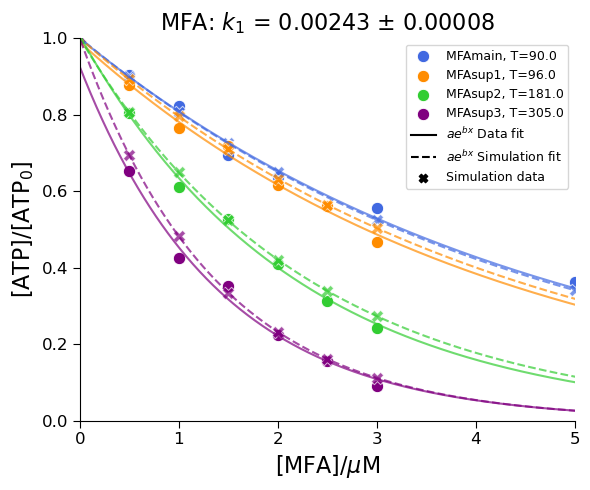

In [10]:
keff = []
fig, ax = plt.subplots(figsize=figsize)
for i, title in enumerate(['MFAmain','MFAsup1','MFAsup2','MFAsup3']):
    sim = sims[title]
    shift = -1
    plot_scatter(ax,  (sim.x+shift), (sim.y), label=f"{title}, T={sim.T}", marker='o', color=nicecolors[i], alpha=1)
    plot_scatter(ax, (sim.var_concs), (sim.Tmes),marker='X', color=nicecolors[i])

    #fit exponetial and shift
    popt, popc, R2 = plot_fit(ax, (sim.x+shift), (sim.y), exp_fit, color=nicecolors[i], label = None)
    keff.append(popt[1]/sim.T)
    popt, popc, R2 = plot_fit(ax, (sim.var_concs), (sim.Tmes), exp_fit, color=nicecolors[i], label = None, linestyle='--')

    plot_labels(ax, f"[{indepvar}]$/\mu$M", r"[ATP]/[ATP$_0$]", f"{indepvar} kinetics") #T={sim.T}
    plot_lims(ax, sim.x, sim.Tmes, [0,5],[0,1])
    plot_ticks(ax)
    
    sims[title] = sim
plt.plot([],[], label='$ae^{bx}$ Data fit', color='black')
plt.plot([],[], label='$ae^{bx}$ Simulation fit', color='black', linestyle='--')
plt.scatter([],[], label='Simulation data', color='black', marker='X', alpha=1)

plot_legend(ax, legfts = 9, loc='upper right')
keff = np.array(keff)
print(f"k_1 = {-keff.mean():.5f} ± {keff.std():.5f}")
plt.title(f"MFA: $k_1$ = {-keff.mean():.5f} ± {keff.std():.5f}", fontsize=16)
name = 'MFA_plot'
plt.tight_layout()
if save ==True:
    plt.savefig(f'{name}.png', dpi=1500)

## AAP

In [11]:
# define rates and concerntraions
rates = {'k1_0': 1.5 * .22428/90 , 'k1_c': 0.03, 'k2_0': 1.5, 'k2_c': 20}
concs = {'ATP': 2000.0, 'MFA_star0': 0.0, 'MFA': 2.0, 'FAE': 0.0, 'AAP': 0.0}

# rates = {'k1_0': 3.5 * .22428/90 , 'k1_c': 0.03, 'k2_0': 3.5, 'k2_c': 25}
# concs = {'ATP': 2000.0, 'MFA_star0': 0.0, 'MFA': 1.0, 'FAE': 0.0, 'AAP': 0.0}

F_KD = 0.35
F_n = 4

for i, title in enumerate(['AAPmain','AAPsup1','AAPsup2','AAPsup3']):

    shift = 0
    # load dataset of interest
    x, y, indepvar, T = load_dataset(title)
    # set the [enzyme] which is varried to array of what it is
    if title == 'xAAPmain':
            x = x[1:]
            y = y[1:]
    concs[indepvar] = x.to_numpy() + shift
    concs[indepvar] = np.append(concs[indepvar],0)
    # simulation class containing everthing to do with sim
    sim = simulation(concs, rates, indepvar) # initialise
    sim.x = x; sim.y = y; sim.T = T # add the data to it
    sim.sim_over_var() # sim over variable [enzyme]
    sim.interpolate(sim.T) # interpolate to find value at specific T

    sims[title] = sim

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

Fit parameters: [ 0.37679345 -2.14090098]  R^2: 0.9929470605280426
Fit parameters: [ 0.23968059 -2.7601507 ]  R^2: 0.9987617029373967
Fit parameters: [ 0.32386418 -2.98643512]  R^2: 0.9986481516760957
Fit parameters: [ 0.40694824 -3.33569875]  R^2: 0.9984427595773926


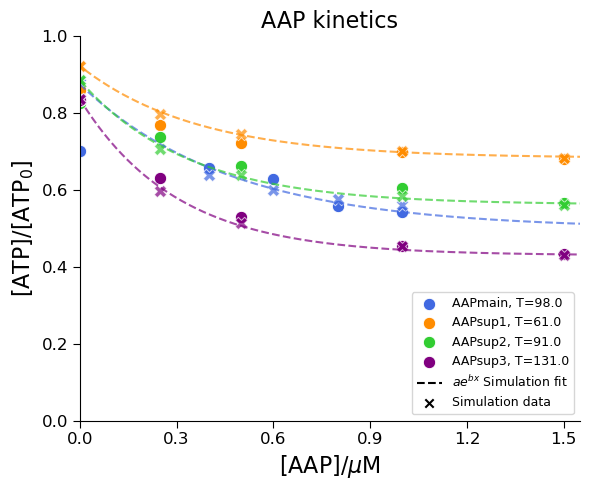

In [12]:
keff = []
fig, ax = plt.subplots(figsize=figsize)
for i, title in enumerate(['AAPmain','AAPsup1','AAPsup2','AAPsup3']): #,
    sim = sims[title]
    shift = 0

    plot_scatter(ax,  (sim.x+shift), (sim.y), label=f"{title}, T={sim.T}", marker='o', color=nicecolors[i], alpha=1)
    plot_scatter(ax, (sim.var_concs), (sim.Tmes),marker='X', color=nicecolors[i])
    exp_fitC = lambda x, a, b: a * np.exp(b * x) + sim.y.min() #exp_fit
    #fit exponetial and shift
    # popt, popc, R2 = plot_fit(ax, (sim.x+shift), (sim.y), exp_fitC, color=nicecolors[i], label = None)
    exp_fitC = lambda x, a, b: a * np.exp(b * x) + sim.Tmes.min() #exp_fit
    popt, popc, R2 = plot_fit(ax, (sim.var_concs), (sim.Tmes), exp_fitC, color=nicecolors[i], label = None, linestyle='--')

    plot_labels(ax, f"[{indepvar}]$/\mu$M", r"[ATP]/[ATP$_0$]", f"{indepvar} kinetics") #T={sim.T}
    plot_lims(ax, sim.x, sim.Tmes, [0,1.55],[0,1])
    
    
    sims[title] = sim
plot_ticks(ax, default_ticks=6)
# plt.plot([],[], label='$ae^{bx}$ Data fit', color='black')
plt.plot([],[], label='$ae^{bx}$ Simulation fit', color='black', linestyle='--')
plt.scatter([],[], label='Simulation data', color='black', marker='x', alpha=1)

plot_legend(ax, legfts = 9, loc='lower right')
name = 'AAP_plot'
plt.tight_layout()
if save ==True:
    plt.savefig(f'{name}.png', dpi=1500)

## FAE

In [189]:
# define rates and concerntraions
rates = {'k1_0': 1*0.002426 , 'k1_c': 0.02, 'k2_0': 50., 'k2_c': 0.0}
concs = {'ATP': 2000.0, 'MFA_star0': 0.0, 'MFA': 1.0, 'FAE': 0.0, 'AAP': 0.0}
F_KD = 0.35 ; F_n = 4
for i, title in enumerate(['FAEmain','FAEsup1','FAEsup2','FAEsup3']):

    shift = 0
    # load dataset of interest
    x, y, indepvar, T = load_dataset(title)
    # set the [enzyme] which is varried to array of what it is
    concs[indepvar] = x.to_numpy() + shift
    concs[indepvar] = np.append(concs[indepvar],0)
    # simulation class containing everthing to do with sim
    sim = simulation(concs, rates, indepvar) # initialise
    sim.x = x; sim.y = y; sim.T = T # add the data to it
    sim.sim_over_var() # sim over variable [enzyme]
    sim.interpolate(sim.T) # interpolate to find value at specific T

    sims[title] = sim

In [191]:
F_n

4

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_a

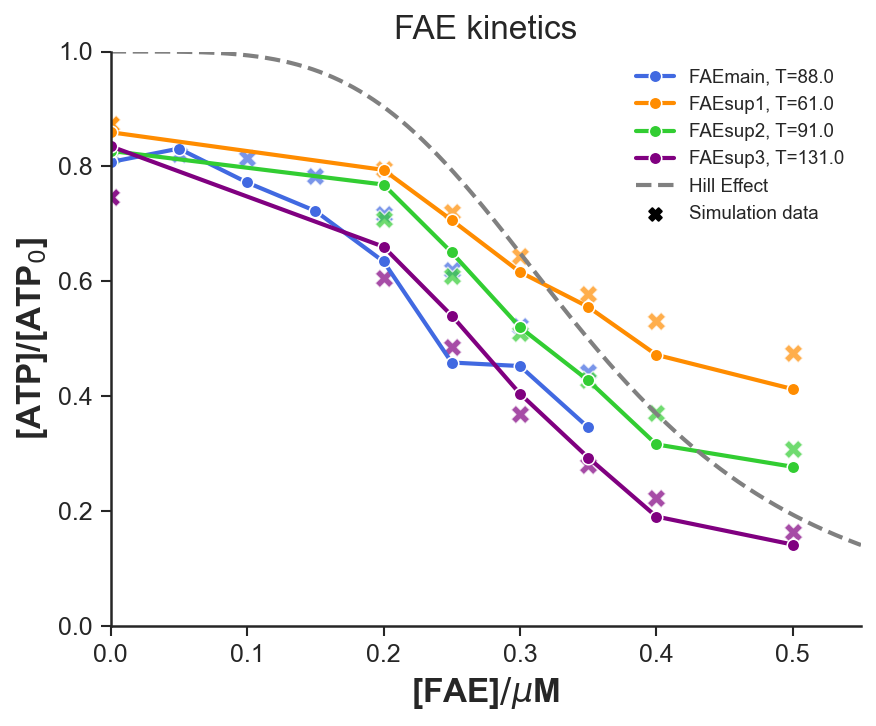

In [190]:
keff = []
fig, ax = plt.subplots(figsize=(6, 5))
for i, title in enumerate(['FAEmain','FAEsup1','FAEsup2','FAEsup3']): #'FAEmain',
    sim = sims[title]
    shift = 0
    plot_data(ax,  (sim.x+shift), (sim.y), label=f"{title}, T={sim.T}", color=nicecolors[i], alpha=1)
    plot_scatter(ax, (sim.var_concs), (sim.Tmes),marker='X', color=nicecolors[i])

    #fit exponetial and shift
    # popt, popc, R2 = plot_fit(ax, (sim.x+shift), (sim.y), exp_fit, color=nicecolors[i], label = None)
    # popt, popc, R2 = plot_fit(ax, (sim.var_concs), (sim.Tmes), exp_fit, color=nicecolors[i], label = None, linestyle='--')

    plot_labels(ax, f"[{indepvar}]$/\mu$M", r"[ATP]/[ATP$_0$]", f"{indepvar} kinetics") #T={sim.T}
    plot_lims(ax, sim.x, sim.Tmes, [0,0.55],[0,1])
    
    
    sims[title] = sim
plot_ticks(ax, default_ticks=6)
# plt.plot([],[], label='$ae^{bx}$ Data fit', color='black')
# plt.plot([],[], label='$ae^{bx}$ Simulation fit', color='black', linestyle='--')

lin = np.linspace(0, 0.55, 1000)
plt.plot(lin, (1-lin**F_n /(lin**F_n + F_KD**F_n)), color='grey', linestyle='--', label = 'Hill Effect')
plt.scatter([],[], label='Simulation data', color='black', marker='X', alpha=1)

plot_legend(ax, legfts = 9, loc='upper right')

name = 'FAE_plot'
plt.tight_layout()
if save ==True:
    plt.savefig(f'{name}.png', dpi=1500)# plt.savefig(f'/content/drive/MyDrive/POBS/figs/{name}.png', dpi=1500)

## AAP and FAE 

In [158]:
# 2 uncopled independent variables
#Initiation of parameters:
"""
rates = {'k1_0': 3.5 * .22428/90 , 'k1_c': 0.04, 'k2_0': 3.5, 'k2_c': 25}
concs = {'ATP': 2000.0, 'MFA_star0': 0.0, 'MFA': 1.0, 'FAE': 0.0, 'AAP': 0.0} #matches AAP

rates = {'k1_0': 1. * .22428/90 , 'k1_c': 0.04, 'k2_0': 50, 'k2_c': 20}
concs = {'ATP': 2000.0, 'MFA_star0': 0.0, 'MFA': 1.0, 'FAE': 0.0, 'AAP': 0.0} #matches FAE
"""
rates = {'k1_0': 3.5 * .22428/90 , 'k1_c': 0.4, 'k2_0': 10, 'k2_c': 25}
concs = {'ATP': 2000.0, 'MFA_star0': 0.0, 'MFA': 1.0, 'FAE': 0.0, 'AAP': 0.0} #matches both?

F_KD = 0.35 ; F_n = 4
# load dataset of interest
x1, x2, y, indepvar1, indepvar2, T = load_dataset_v2('ALLmain')

sim = simulation(concs, rates, indepvar='FAE')   # name ignored here
grid = sim.sim_over_two_vars(indepvar1, indepvar2,
                             x1, x2,
                             t_max=T)

# get ATP values from the grid
ATP = np.array([[cell['ATP'][-1] for cell in row] for row in grid])

x2_mesh, x1_mesh = np.meshgrid(x2, x1)  # note the order for axes



In [177]:
ATP.shape

(16, 16)

In [165]:
import plotly.graph_objects as go
import numpy as np

# x1, x2, ATP are 2D arrays
x2_mesh, x1_mesh = np.meshgrid(x2, x1)

# Flatten all arrays for scatter plot
x_vals = x1_mesh.flatten()  # [FAE] (µM)
y_vals = x2_mesh.flatten()  # [AAP] (µM)
z_vals = ATP.flatten()    # [ATP]/[ATP]₀ at T=90 s

# Create the 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=x_vals,
    y=y_vals,
    z=z_vals,
    name = 'Simulation',
    mode='markers',
    marker=dict(
        size=4,
        color=nicecolors[0],  # Color by ATP value
        opacity=0.8
    )
)])

# Add another trace without overwriting the original
fig.add_trace(go.Scatter3d(
    x=x1,
    y=x2,
    z=y,
    name = 'Data',
    mode='markers',
    marker=dict(
        size=4,
        color=nicecolors[1],  # Color by ATP90 value
        opacity=0.8
    )
))


# Update layout for better visualization
fig.update_layout(
    title = title,
    scene=dict(
        xaxis_title=f'[{indepvar1}] (µM)',
        yaxis_title=f'[{indepvar2}] (µM)',
        zaxis_title='[ATP] / [ATP]₀',
        aspectmode='cube',
        
    ),
    margin=dict(l=0, r=0, b=0, t=40),  # Remove extra padding
)

camera = dict(
    up=dict(x=0, y=0, z=1),
    center=dict(x=0, y=0, z=-0.2),
    eye=dict(x=1.5, y=1.5, z=.5)
)

fig.update_layout(scene_camera=camera)
fig.update_traces(textfont=dict(size=18))
# fig.write_image("2var3D.png")  # Increase scale for higher resolution

fig.show()

In [168]:
z_vals

array([0.76687555, 0.76687555, 0.76687555, 0.76687555, 0.76687555,
       0.69738094, 0.6587317 , 0.63905088, 0.76687555, 0.76687555,
       0.76687555, 0.6587317 , 0.69738094, 0.69738094, 0.69738094,
       0.63905088, 0.76687555, 0.76687555, 0.76687555, 0.76687555,
       0.76687555, 0.69738094, 0.6587317 , 0.63905088, 0.76687555,
       0.76687555, 0.76687555, 0.6587317 , 0.69738094, 0.69738094,
       0.69738094, 0.63905088, 0.76687555, 0.76687555, 0.76687555,
       0.76687555, 0.76687555, 0.69738094, 0.6587317 , 0.63905088,
       0.76687555, 0.76687555, 0.76687555, 0.6587317 , 0.69738094,
       0.69738094, 0.69738094, 0.63905088, 0.76687555, 0.76687555,
       0.76687555, 0.76687555, 0.76687555, 0.69738094, 0.6587317 ,
       0.63905088, 0.76687555, 0.76687555, 0.76687555, 0.6587317 ,
       0.69738094, 0.69738094, 0.69738094, 0.63905088, 0.76687555,
       0.76687555, 0.76687555, 0.76687555, 0.76687555, 0.69738094,
       0.6587317 , 0.63905088, 0.76687555, 0.76687555, 0.76687

In [171]:
x_vals

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.25, 0.25, 0.25, 0.25,
       0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25,
       0.25, 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.

In [170]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

# x1, x2, ATP, y are 2D arrays
# x2_mesh, x1_mesh = np.meshgrid(x2, x1)  # Already used if needed

# x1, x2, ATP are 2D arrays
x2_mesh, x1_mesh = np.meshgrid(x2, x1)

# Flatten all arrays for scatter plot
x_vals = x1_mesh.flatten()  # [FAE] (µM)
y_vals = x2_mesh.flatten()  # [AAP] (µM)
z_vals = ATP.flatten()    # [ATP]/[ATP]₀ at T=90 s

# Create subplot layout: 1 row, 2 columns
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Simulation", "Experimental Data"),
    horizontal_spacing=0.1
)

# --- Left plot: Simulation ---
fig.add_trace(go.Heatmap(
    x=x_vals,  # [AAP]
    y=y_vals,  # [FAE]
    z=z_vals,
    colorscale='Viridis',
    colorbar=dict(title='[ATP]/[ATP]₀'),
), row=1, col=1)

# --- Right plot: Experimental ---
fig.add_trace(go.Heatmap(
    x=x1,
    y=x2,
    z=y,
    colorscale='Viridis',
    showscale=False  # Hide 2nd colorbar to avoid clutter
), row=1, col=2)

# Update layout
fig.update_layout(
    title_text=None,
    height=500,
    width=1000,
    showlegend=False,
    font=dict(size=16)
)

# Update axis labels
fig.update_xaxes(title_text=f"[{indepvar2}] (µM)", row=1, col=1)
fig.update_yaxes(title_text=f"[{indepvar1}] (µM)", row=1, col=1)

fig.update_xaxes(title_text=f"[{indepvar2}] (µM)", row=1, col=2)
fig.update_yaxes(title_text="", row=1, col=2)
fig.write_image("2varcolor.png")  # Increase scale for higher resolution

fig.show()

In [166]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

# x1, x2, ATP, y are 2D arrays
x2_mesh, x1_mesh = np.meshgrid(x2, x1)

# Flatten all arrays for simulation scatter plot
x_vals = x1_mesh.flatten()  # [FAE] (µM)
y_vals = x2_mesh.flatten()  # [AAP] (µM)
z_vals = ATP.flatten()      # Simulated [ATP]/[ATP]₀ at T=90 s

# Compute difference (Simulation - Experimental)
diff = z_vals - y  # Can also use np.abs(ATP - y) for unsigned difference

# Create subplot layout: 1 row, 3 columns
fig = make_subplots(
    rows=1, cols=3,
    subplot_titles=("Simulation", "Experimental Data", "Difference (Sim - Exp)"),
    horizontal_spacing=0.07
)

# --- Left plot: Simulation ---
fig.add_trace(go.Heatmap(
    x=x_vals, y=y_vals, z=z_vals,
    colorscale='Viridis',
    colorbar=dict(title='[ATP]/[ATP]₀'),
), row=1, col=1)

# --- Middle plot: Experimental ---
fig.add_trace(go.Heatmap(
    x=x2, y=x1, z=y,
    colorscale='Viridis',
    showscale=False
), row=1, col=2)

# --- Right plot: Difference ---
fig.add_trace(go.Heatmap(
    x=x2, y=x1, z=diff,
    colorscale='RdBu',  # Good for signed differences
    colorbar=dict(title='Δ [ATP]/[ATP]₀')
), row=1, col=3)

# Update layout
fig.update_layout(
    height=500, width=1500,
    showlegend=False,
    font=dict(size=16)
)

# Update axis labels
for col in range(1, 4):
    fig.update_xaxes(title_text=f"[{indepvar2}] (µM)", row=1, col=col)
fig.update_yaxes(title_text=f"[{indepvar1}] (µM)", row=1, col=1)
fig.update_yaxes(title_text="", row=1, col=2)
fig.update_yaxes(title_text="", row=1, col=3)

fig.write_image("2varcolor_diff.png")
fig.show()

ValueError: operands could not be broadcast together with shapes (256,) (16,) 

# Stochastic Simulation

In [132]:
import gillespy2 as gillespy

class MFASimulation(gillespy.Model):
    """
    A stochastic simulation model for the MFA (Metabolic Flux Analysis) reaction system
    using the Gillespie algorithm via gillespy2.

    This model simulates the interaction between metabolites ATP, MFA, MFA*, FAE, and AAP 
    with reaction rates influenced by user-supplied parameters. The reactions are:

        1. ATP + MFA + FAE → MFA* + FAE   (FAE acts catalytically)
        2. MFA* + AAP → MFA + AAP         (AAP acts catalytically)

    Parameters
    ----------
    concs : dict
        Initial concentrations of the species, e.g.
        {'ATP': 100, 'MFA': 50, 'MFA_star0': 0, 'FAE': 10, 'AAP': 10}
    
    rates : dict
        Rate constants for the reactions, e.g.
        {'k1_0': 0.1, 'k1_c': 0.01, 'k2_0': 0.05, 'k2_c': 0.02}

    indepvar : str
        Currently unused. Reserved for future functionality where one species may
        be used as an independent variable in a parameter sweep or analysis.

    Notes
    -----
    - The model uses string-based propensity functions with catalytic enhancement terms.
    - FAE and AAP are assumed to act catalytically and are not consumed in their reactions.
    - The simulation time span is fixed at 100 units, with 100 time steps.
    """
    def __init__(self, concs, rates, indepvar):
        super().__init__('MFA_Reaction')

        # Parameters (rate constants)
        self.k1_0 = gillespy.Parameter(name='k1_0', expression=rates['k1_0'])
        self.k1_c = gillespy.Parameter(name='k1_c', expression=rates['k1_c'])
        self.k2_0 = gillespy.Parameter(name='k2_0', expression=rates['k2_0'])
        self.k2_c = gillespy.Parameter(name='k2_c', expression=rates['k2_c'])
        self.add_parameter([self.k1_0, self.k1_c, self.k2_0, self.k2_c])

        # Species (concentrations)
        self.ATP = gillespy.Species(name='ATP', initial_value=concs['ATP'])
        self.MFA = gillespy.Species(name='MFA', initial_value=concs['MFA'])
        self.MFA_star = gillespy.Species(name='MFA_star', initial_value=concs['MFA_star0'])
        self.FAE = gillespy.Species(name='FAE', initial_value=concs['FAE'])
        self.AAP = gillespy.Species(name='AAP', initial_value=concs['AAP'])
        self.add_species([self.ATP, self.MFA, self.MFA_star, self.FAE, self.AAP])

        # Reaction 1: ATP + MFA + FAE → MFA* + FAE
        reaction1 = gillespy.Reaction(
            name='ATP_MFA_to_MFA_star',
            reactants={self.ATP: 1, self.MFA: 1, self.FAE: 1},
            products={self.MFA_star: 1, self.FAE: 1},
            propensity_function="(k1_0 + k1_c * FAE) * ATP * MFA"
        )

        # Reaction 2: MFA* + AAP → MFA + AAP
        reaction2 = gillespy.Reaction(
            name='MFA_star_to_MFA',
            reactants={self.MFA_star: 1, self.AAP: 1},
            products={self.MFA: 1, self.AAP: 1},
            propensity_function="(k2_0 + k2_c * AAP) * MFA_star"
        )

        self.add_reaction([reaction1, reaction2])

        # Set simulation timespan
        self.timespan(np.linspace(0, 310, 100))

def units_coversion(conc, V):
    """Converts concentration and volume to number of molecules.

    Args:
        conc (float or np.array): 
        V (float): reaction Volume in liters
    """
    NA = 6.022e23 #avagadro mol^-1
    n = conc*NA # molecules / litre
    N = n * V
    return(np.round(N)) #round to integer



In [18]:
simsstoch = {}

In [19]:
V = 1e-15 #1 pico liter
concs = {'ATP': units_coversion(1e-6 * 2000, V),
         'MFA': units_coversion(1e-6 , V),
         'MFA_star0': 0, 'FAE': 0, 'AAP':0}

rates = {'k1_0': 0.00249/units_coversion(1e-6 , V) , 'k1_c': 0.03/units_coversion(1e-6 , V)**2,
          'k2_0': 10000, 'k2_c': 25.0/units_coversion(1e-6 , V)} #work with 1microM MFA

for i, title in enumerate(['MFAmain','MFAsup1','MFAsup2','MFAsup3']): #'MFAmain'

    # load dataset of interest
    x, y, indepvar, T = load_dataset(title)
    x = x-1
    # set the [enzyme] which is varried to array of what it is
    concs[indepvar] = units_coversion(1e-6 * x.to_numpy(), V)
    sim = simulation(concs, rates, indepvar)
    sim.x = x; sim.y = y; sim.T = T
    sim.Stoch_sim_over_var()
    sim.interpolate(sim.T)

    simsstoch[title] = sim

100%|██████████| 6/6 [00:22<00:00,  3.67s/it]


/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_a

Fit parameters: [ 0.99980513 -0.21206622]  R^2: 0.9960762845841125
Fit parameters: [ 0.990097   -0.23649915]  R^2: 0.9877793777605801
Fit parameters: [ 1.00630678 -0.4606118 ]  R^2: 0.9936896313523746
Fit parameters: [ 0.92576284 -0.7136051 ]  R^2: 0.9893299234720905


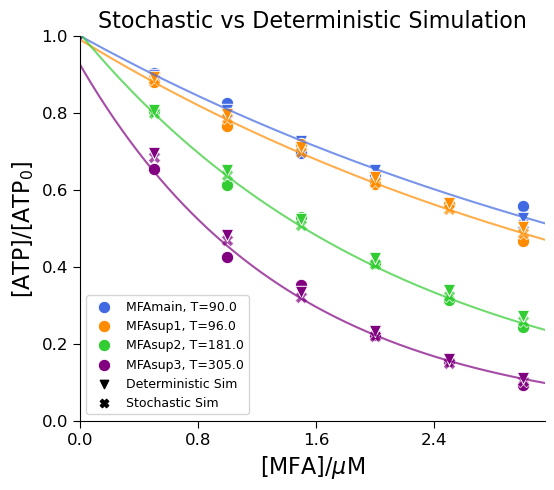

In [20]:
fig, ax = plt.subplots(figsize=figsize)
for i, title in enumerate(['MFAmain','MFAsup1','MFAsup2','MFAsup3']): #'AAPsup1','AAPsup2','AAPsup3'
    sim = simsstoch[title]
    shift = 0
    plot_scatter(ax,  sim.x, (sim.y), label=f"{title}, T={sim.T}", color=nicecolors[i], alpha=1, marker='o')
    plot_scatter(ax, sim.x, (sim.Tmes),marker='X', color=nicecolors[i])

    #fit exponetial and shift
    popt, popc, R2 = plot_fit(ax, sim.x, (sim.y), exp_fit, color=nicecolors[i], label = None)
    # popt, popc, R2 = plot_fit(ax, sim.x, (sim.Tmes), exp_fitC, color=nicecolors[i], label = None, linestyle='--')

    plot_labels(ax, f"[{indepvar}]$/\mu$M", r"[ATP]/[ATP$_0$]", f"{indepvar} kinetics") #T={sim.T}
    plot_lims(ax, sim.x, sim.Tmes, [0,'d'],[0,1.])
    plot_ticks(ax)
    
    sim = sims[title]
    plot_scatter(ax, sim.var_concs, (sim.Tmes),marker='v', color=nicecolors[i],alpha=1)

    #fit exponetial and shift
    # popt, popc, R2 = plot_fit(ax, sim.x, (sim.y), exp_fit, color=nicecolors[0], label = None)
    # popt, popc, R2 = plot_fit(ax, sim.var_concs, (sim.Tmes), exp_fitC, color=nicecolors[1], label = None, linestyle='--')

    plot_labels(ax, f"[{indepvar}]$/\mu$M", r"[ATP]/[ATP$_0$]", f"{indepvar} kinetics") #T={sim.T}
    plot_lims(ax, sim.var_concs, sim.Tmes, [0,'d'],[0,1.])
    plot_ticks(ax)
    
plt.scatter( [],[],marker='v', color='black',label='Deterministic Sim',alpha=1)
plt.scatter( [],[],marker='X', color='black',label='Stochastic Sim',alpha=1)

plot_legend(ax, legfts = 9, loc='lower left')
plt.title(f"Stochastic vs Deterministic Simulation", fontsize=16)
name = 'MFA_stoch_plot'
if save ==True:
    plt.savefig(f'{name}.png', dpi=1500)

In [187]:
simsstoch

{'MFAmain': <__main__.simulation at 0x16d861190>,
 'MFAsup1': <__main__.simulation at 0x16d94fad0>,
 'MFAsup2': <__main__.simulation at 0x16d861710>,
 'MFAsup3': <__main__.simulation at 0x16dede250>,
 'AAPmain': <__main__.simulation at 0x30e37e250>,
 'FAEsup1': <__main__.simulation at 0x30e48f350>}

In [188]:
simsstoch['FAEsup1'].var_concs

array([  0., 120., 151., 181., 211., 241., 301.])

In [ ]:
# define rates and concerntraions
V = 1e-15 #1 pico liter
concs = {'ATP': units_coversion(1e-6 * 2000, V),
         'MFA': units_coversion(1e-6 , V),
         'MFA_star0': 0, 'FAE': 0, 'AAP':0}

rates = {'k1_0': 3.5*0.00249/units_coversion(1e-6 , V) , 'k1_c': 0.03/units_coversion(1e-6 , V)**2,
          'k2_0': 3.5, 'k2_c': 25.0/units_coversion(1e-6 , V)} #work with 1microM MFA


for i, title in enumerate(['AAPmain','AAPsup1','AAPsup2','AAPsup3']):

    # load dataset of interest
    x, y, indepvar, T = load_dataset(title)
    
    # set the [enzyme] which is varried to array of what it is
    concs[indepvar] = units_coversion(1e-6 * x.to_numpy(), V)
    sim = simulation(concs, rates, indepvar)
    sim.x = x; sim.y = y; sim.T = T
    sim.Stoch_sim_over_var()
    sim.interpolate(sim.T)

    simsstoch[title] = sim

100%|██████████| 9/9 [00:34<00:00,  3.87s/it]


In [71]:
import plotting_presets as pp

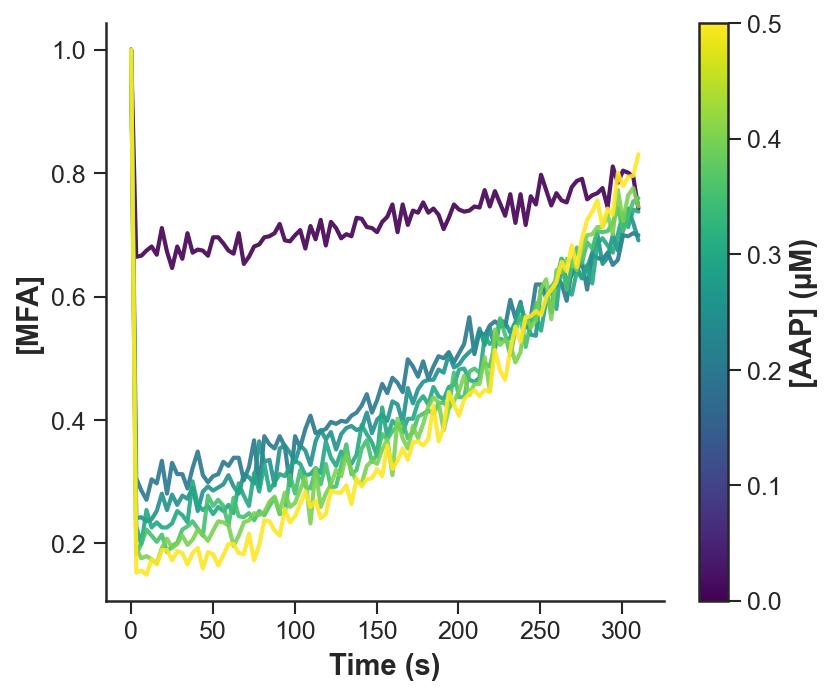

In [155]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as colors

xconc = []
yconc = []
sim = simsstoch['FAEsup1']
fig, ax = plt.subplots(figsize=figsize)

# Assume sim.var_concs is [AAP] in M or µM (convert as needed)
AAP_concs = np.array([sim.var_concs[i]/units_coversion(1e-6 , V) for i in range(len(sim.var_concs))])  # [AAP] values

# Normalize [AAP] for colormap
norm = colors.Normalize(vmin=AAP_concs.min(), vmax=AAP_concs.max())
cmap = cm.viridis
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

for i, trajectory in enumerate(sim.results):
    aap_val =sim.var_concs[i]/units_coversion(1e-6 , V)  # [AAP] value
    color = cmap(norm(aap_val))

    ax.plot(trajectory['time'], trajectory['MFA']/ concs['MFA'],
            label=f"[AAP] = {aap_val:.2g} µM", color=color, alpha=0.9)

    xconc.append(aap_val / units_coversion(1e-6, V))  # Or just `aap_val` if already in µM
    yconc.append(trajectory['MFA'].mean() / concs['MFA'])
    errors = trajectory['MFA'].std() / concs['MFA']

xconc = np.array(xconc)
yconc = np.array(yconc)

# Add colorbar for [AAP]
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('[AAP] (µM)', fontsize=14)
cbar.ax.tick_params(labelsize=12)

# Axes styling
ax.set_xlabel("Time (s)", fontsize=14)
ax.set_ylabel("[MFA]", fontsize=14)
ax.tick_params(labelsize=12)

In [122]:
simsstoch['FAEsup1'].results[1]['MFA']

array([6022.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0., 5969., 6022., 6022., 6022., 6022., 6022., 6022., 6022.,
       6022., 6022., 6022., 6022., 6022., 6022., 6022., 6022., 6022.,
       6022., 6022., 6022., 6022., 6022., 6022., 6022., 6022., 6022.,
       6022., 6022., 6022., 6022., 6022., 6022., 6022., 6022., 6022.,
       6022.])

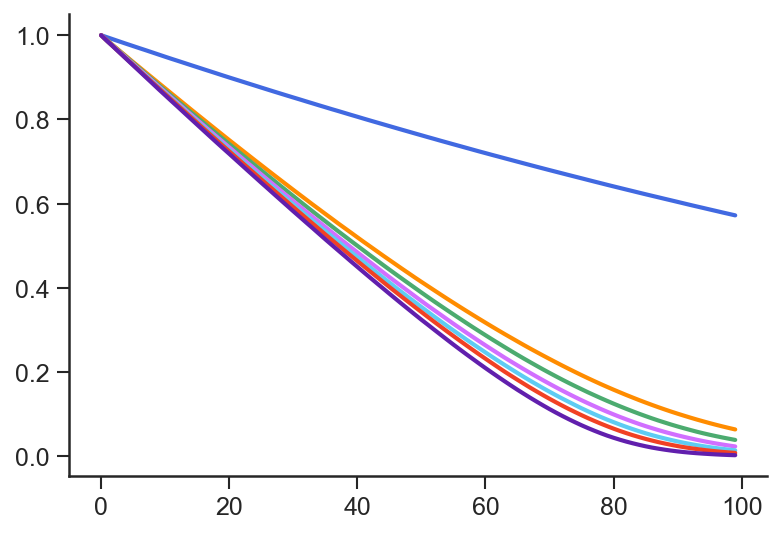

In [140]:
for i, res in enumerate(simsstoch['FAEsup1'].results):
    plt.plot(simsstoch['FAEsup1'].results[i]['ATP'])

In [150]:
trajectory['MFA_star']

array([  0., 198., 176., 205., 200., 185., 204., 179., 181., 179., 194.,
       171., 200., 197., 210., 186., 188., 186., 188., 187., 172., 167.,
       180., 190., 170., 197., 195., 168., 177., 174., 177., 192., 177.,
       161., 149., 167., 179., 207., 160., 179., 165., 180., 180., 171.,
       146., 176., 154., 174., 159., 179., 173., 175., 159., 170., 159.,
       155., 152., 169., 183., 158., 146., 154., 167., 162., 163., 151.,
       151., 161., 159., 143., 149., 148., 149., 150., 148., 151., 152.,
       149., 148., 148., 150., 159., 162., 142., 132., 141., 118., 125.,
       143., 141., 149., 166., 154., 138., 127., 146., 138., 132., 136.,
       134.])

Fit parameters: [0.13587302 0.34989303]  R^2: 0.06971174675849745


/var/folders/pt/tzm_d9zs1yzdflvw_9xczlvw0000gn/T/ipykernel_94394/2280481935.py:14: RuntimeWarning:

divide by zero encountered in power

/var/folders/pt/tzm_d9zs1yzdflvw_9xczlvw0000gn/T/ipykernel_94394/2280481935.py:14: RuntimeWarning:

invalid value encountered in divide

/var/folders/pt/tzm_d9zs1yzdflvw_9xczlvw0000gn/T/ipykernel_94394/2280481935.py:14: RuntimeWarning:

invalid value encountered in power

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



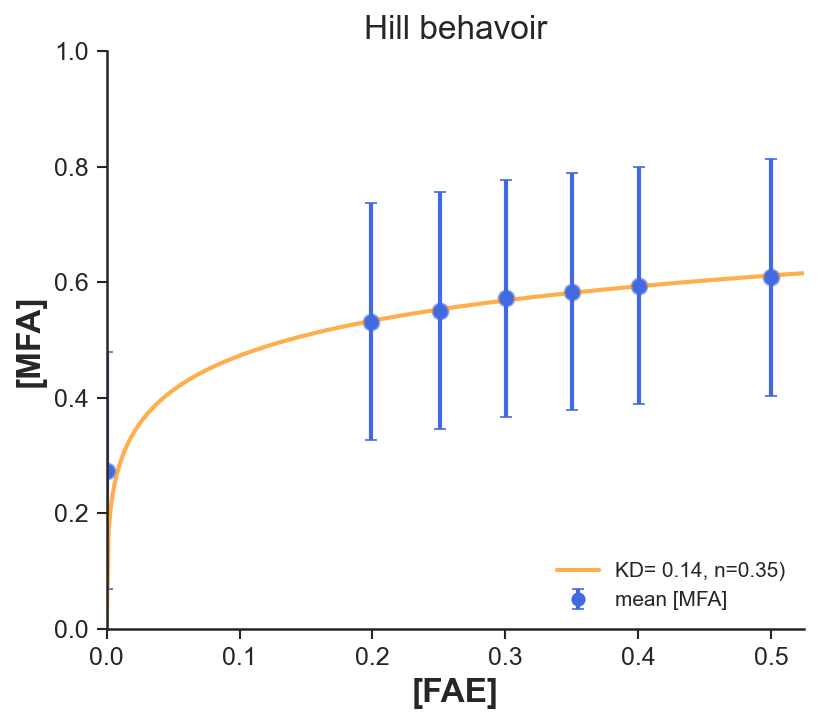

In [154]:
# Plot results
xconc = []
yconc = []
sim = simsstoch['FAEsup1']
fig, ax = plt.subplots(figsize=figsize)
for i, trajectory in enumerate(sim.results):
    # plt.plot(trajectory['time'], trajectory['MFA'],label=sim.var_concs[i], alpha=0.3)
    xconc.append(sim.var_concs[i]/units_coversion(1e-6 , V))
    yconc.append(trajectory['MFA_star'].mean()/concs['MFA'])
    errors = trajectory['MFA_star'].std()/concs['MFA']
xconc = np.array(xconc); yconc = np.array(yconc)

# fit to hill function (but shift due to catalytic effect )
hill = lambda L, K_A, n: L**n/(L**n+ K_A**n) #+ yconc.min()
hill_label = lambda K_A, n: f"KD= {K_A:.2f}, n={n:.2f})"
plot_scatter(ax, xconc, yconc, color=nicecolors[0], marker='o')
plt.errorbar(xconc, yconc, yerr=errors, fmt='o', capsize=3,color=nicecolors[0], label='mean [MFA]')

popt, popc, R2 = plot_fit(ax, xconc, yconc, hill, label=hill_label,color=nicecolors[1])
plot_lims(ax, xconc, yconc, [0,'d'],[0,1])
plot_labels(ax, f'[{sim.indepvar}]', "[MFA]", "Hill behavoir")
plot_ticks(ax, default_ticks=6)
plot_legend(ax, legfts = 10, loc='lower right')
name = 'AAP_hill_plot'
if save ==True:
    plt.savefig(f'{name}.png', dpi=1500)

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



KeyError: 'AAPsup1'

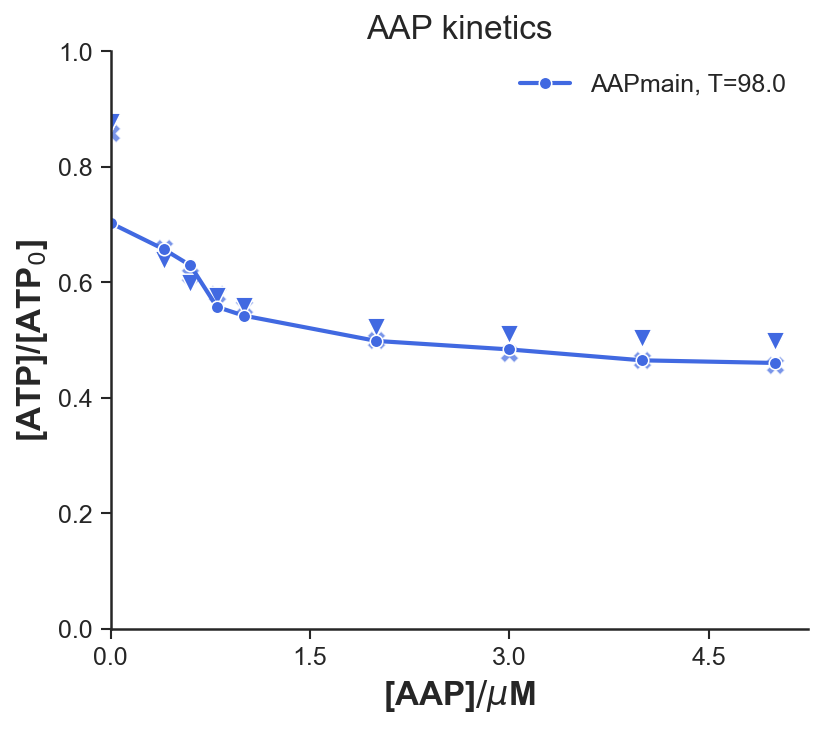

In [80]:
fig, ax = plt.subplots(figsize=figsize)
for i, title in enumerate(['AAPmain','AAPsup1','AAPsup2','AAPsup3']): #'AAPsup1','AAPsup2','AAPsup3'
    sim = simsstoch[title]
    shift = 0
    plot_data(ax,  sim.x, (sim.y), label=f"{title}, T={sim.T}", color=nicecolors[i], alpha=1)
    plot_scatter(ax, sim.x, (sim.Tmes),marker='X', color=nicecolors[i])

    #fit exponetial and shift
    # popt, popc, R2 = plot_fit(ax, sim.x, (sim.y), exp_fit, color=nicecolors[i], label = None)
    # popt, popc, R2 = plot_fit(ax, sim.x, (sim.Tmes), exp_fitC, color=nicecolors[i], label = None, linestyle='--')

    plot_labels(ax, f"[{indepvar}]$/\mu$M", r"[ATP]/[ATP$_0$]", f"{indepvar} kinetics") #T={sim.T}
    plot_lims(ax, sim.x, sim.Tmes, [0,'d'],[0,1.])
    plot_ticks(ax)
    
    sim = sims[title]
    plot_scatter(ax, sim.var_concs, (sim.Tmes),marker='v', color=nicecolors[i],alpha=1)

    #fit exponetial and shift
    # popt, popc, R2 = plot_fit(ax, sim.x, (sim.y), exp_fit, color=nicecolors[0], label = None)
    # popt, popc, R2 = plot_fit(ax, sim.var_concs, (sim.Tmes), exp_fitC, color=nicecolors[1], label = None, linestyle='--')

    plot_labels(ax, f"[{indepvar}]$/\mu$M", r"[ATP]/[ATP$_0$]", f"{indepvar} kinetics") #T={sim.T}
    plot_lims(ax, sim.var_concs, sim.Tmes, [0,'d'],[0,1.])
    plot_ticks(ax)
    
plt.scatter( [],[],marker='v', color='black',label='Deterministic Sim',alpha=1)
plt.scatter( [],[],marker='X', color='black',label='Stochastic Sim',alpha=1)

plot_legend(ax, legfts = 9, loc='lower left')
plt.title(f"Stochastic vs Deterministic Simulation", fontsize=16)
name = 'AAP_stoch_plot'
if save ==True:
    plt.savefig(f'{name}.png', dpi=1500)

In [152]:
V = 1e-15 #1 pico liter
concs = {'ATP': units_coversion(1e-6 * 2000, V),
         'MFA': units_coversion(1e-6 , V),
         'MFA_star0': 0, 'FAE': 0, 'AAP':0}

rates = {'k1_0': 0.00249/units_coversion(1e-6 , V) , 'k1_c': 0.05/units_coversion(1e-6 , V)**2,
          'k2_0': 10, 'k2_c': 25.0/units_coversion(1e-6 , V)} #work with 1microM MFA

for i, title in enumerate(['FAEsup1']): #'MFAmain'

    # load dataset of interest
    x, y, indepvar, T = load_dataset(title)
    # set the [enzyme] which is varried to array of what it is
    concs[indepvar] = units_coversion(1e-6 * x.to_numpy(), V)
    sim = simulation(concs, rates, indepvar)
    sim.x = x; sim.y = y; sim.T = T
    sim.Stoch_sim_over_var()
    sim.interpolate(sim.T)

    simsstoch[title] = sim

100%|██████████| 7/7 [00:26<00:00,  3.82s/it]


/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



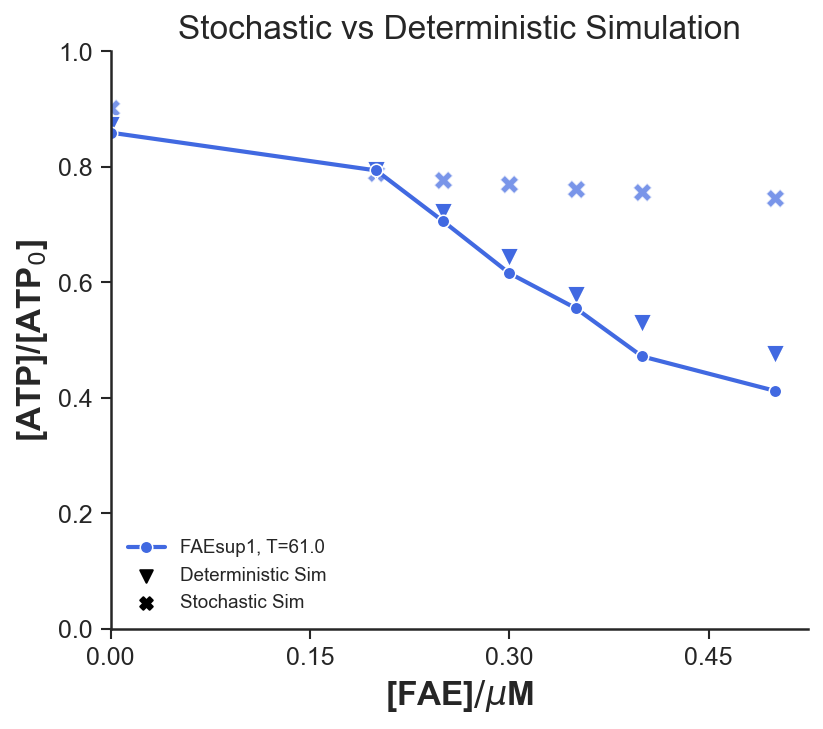

In [153]:
fig, ax = plt.subplots(figsize=figsize)
for i, title in enumerate(['FAEsup1']): #'AAPsup1','AAPsup2','AAPsup3'
    sim = simsstoch[title]
    shift = 0
    plot_data(ax,  sim.x, (sim.y), label=f"{title}, T={sim.T}", color=nicecolors[i], alpha=1)
    plot_scatter(ax, sim.x, (sim.Tmes),marker='X', color=nicecolors[i])

    #fit exponetial and shift
    # popt, popc, R2 = plot_fit(ax, sim.x, (sim.y), exp_fit, color=nicecolors[i], label = None)
    # popt, popc, R2 = plot_fit(ax, sim.x, (sim.Tmes), exp_fitC, color=nicecolors[i], label = None, linestyle='--')

    plot_labels(ax, f"[{indepvar}]$/\mu$M", r"[ATP]/[ATP$_0$]", f"{indepvar} kinetics") #T={sim.T}
    plot_lims(ax, sim.x, sim.Tmes, [0,'d'],[0,1.])
    plot_ticks(ax)
    
    sim = sims[title]
    plot_scatter(ax, sim.var_concs, (sim.Tmes),marker='v', color=nicecolors[i],alpha=1)

    #fit exponetial and shift
    # popt, popc, R2 = plot_fit(ax, sim.x, (sim.y), exp_fit, color=nicecolors[0], label = None)
    # popt, popc, R2 = plot_fit(ax, sim.var_concs, (sim.Tmes), exp_fitC, color=nicecolors[1], label = None, linestyle='--')

    plot_labels(ax, f"[{indepvar}]$/\mu$M", r"[ATP]/[ATP$_0$]", f"{indepvar} kinetics") #T={sim.T}
    plot_lims(ax, sim.var_concs, sim.Tmes, [0,'d'],[0,1.])
    plot_ticks(ax)
    
plt.scatter( [],[],marker='v', color='black',label='Deterministic Sim',alpha=1)
plt.scatter( [],[],marker='X', color='black',label='Stochastic Sim',alpha=1)

plot_legend(ax, legfts = 9, loc='lower left')
plt.title(f"Stochastic vs Deterministic Simulation", fontsize=16)
name = 'AAP_stoch_plot'
if save ==True:
    plt.savefig(f'{name}.png', dpi=1500)

KeyError: 'MFA'

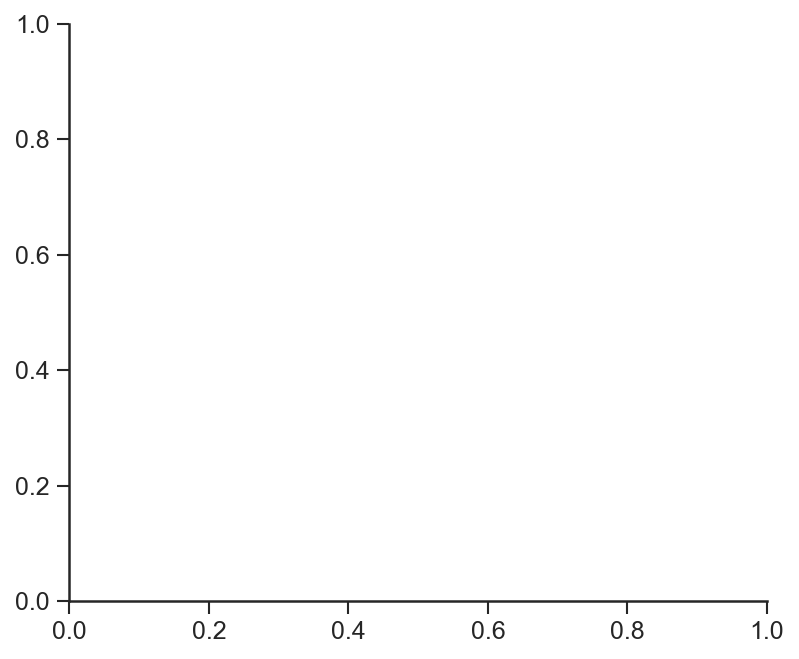

In [93]:
# Plot results
xconc = []
yconc = []
fig, ax = plt.subplots(figsize=figsize)
for i, trajectory in enumerate(sim.results):
    # plt.plot(trajectory['time'], trajectory['MFA'],label=sim.var_concs[i], alpha=0.3)
    xconc.append(sim.var_concs[i]/units_coversion(1e-6 , V))
    yconc.append(trajectory['MFA'].mean()/concs['MFA'])
    errors = trajectory['MFA'].std()/concs['MFA']
xconc = np.array(xconc); yconc = np.array(yconc)

# fit to hill function (but shift due to catalytic effect )
hill = lambda L, K_A, n: L**n/(L**n+ K_A**n) #+ yconc.min()
hill_label = lambda K_A, n: f"KD= {K_A:.2f}, n={n:.2f})"
plot_scatter(ax, xconc, yconc, color=nicecolors[0], marker='o')
plt.errorbar(xconc, yconc, yerr=errors, fmt='o', capsize=3,color=nicecolors[0], label='mean [MFA]')

popt, popc, R2 = plot_fit(ax, xconc, yconc, hill, label=hill_label,color=nicecolors[1])
plot_lims(ax, xconc, yconc, [0,'d'],[0,1])
plot_labels(ax, f'[{sim.indepvar}]', "[MFA]", "Hill behavoir")
plot_ticks(ax, default_ticks=6)
plot_legend(ax, legfts = 10, loc='lower right')
name = 'FAE_hill_plot'
if save ==True:
    plt.savefig(f'{name}.png', dpi=1500)